In [182]:
import pandas as pd
from Functions import get_review_text, spell_checker
import pickle
import re
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk import word_tokenize, FreqDist
import matplotlib.pyplot as plt

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
with open("all_alaska_hotels_full.pickle", "rb") as to_read:
    all_hotels_df = pickle.load(to_read)
nl_df_no_nans = all_hotels_df[(all_hotels_df["Full review"].str.lower().str.contains("northern lights")) | (all_hotels_df["Full review"].str.lower().str.contains("aurora"))]

In [38]:
nl_df_no_nans[nl_df_no_nans["Full review"].str.contains("bettles")]

,Property name,Property address,"Lat, long",Reviewer,Review date,Date of stay,Review title,Full review,Review link
44365,Bettles Lodge,"101 Main St, Bettles, AK 99726","66.918205,-151.518661",skirtandsupersuit,March 2013,February 2013,bucket list dreams (and more) come true at bet...,"i went to bettles lodge with a good friend, wi...",https://www.tripadvisor.com/ShowUserReviews-g3...


In [39]:
nl_df_no_nans[nl_df_no_nans["Full review"].str.contains("mok")]

,Property name,Property address,"Lat, long",Reviewer,Review date,Date of stay,Review title,Full review,Review link
32807,7 Gables Inn & Suites,"4312 Birch Ln, Fairbanks, AK 99709-3443","64.844162,-147.839340",Ayse Leyla K,December 2018,December 2018,A real Alaskan journey!,Despite the fact that I am a non-driving metro...,https://www.tripadvisor.com/ShowUserReviews-g6...
37784,Aurora Borealis Lodge,"Cleary Summit Rd. 1906 Ridge Run Rd, Fairbanks...","65.046288,-147.451065",ChinaGuy14,September 2020,September 2020,Aurora Viewing - the Best!,Mok is the man! He is really kind and makes it...,https://www.tripadvisor.com/ShowUserReviews-g6...
37938,Aurora Borealis Lodge,"Cleary Summit Rd. 1906 Ridge Run Rd, Fairbanks...","65.046288,-147.451065",matkat7,April 2015,March 2015,awesome aurora,The Aurora Borealis Lodge is fantastic! Four f...,https://www.tripadvisor.com/ShowUserReviews-g6...
37974,Aurora Borealis Lodge,"Cleary Summit Rd. 1906 Ridge Run Rd, Fairbanks...","65.046288,-147.451065",AnnaMZB,January 2014,December 2013,"Incredible place, and the best for aurora view...",We've done a lot of research before picking up...,https://www.tripadvisor.com/ShowUserReviews-g6...
37988,Aurora Borealis Lodge,"Cleary Summit Rd. 1906 Ridge Run Rd, Fairbanks...","65.046288,-147.451065",Eva H,August 2013,August 2013,Amazing aurora view,We went cabin standby to see aurora view bt 11...,https://www.tripadvisor.com/ShowUserReviews-g6...
69079,Copper River Princess Wilderness Lodge,Brenwick Craig Road Mile 102 Richardson Highwa...,"61.954941,-145.340302",Ken S,September 2015,September 2015,"Nice views, good place to stay overnight when ...","Average rooms, great view if you can book an e...",https://www.tripadvisor.com/ShowUserReviews-g6...
72105,Best Western Plus Pioneer Park Inn,"1908 Chena Landing Loop, Fairbanks, AK 99701-2704","64.842827,-147.769897",Justin L,January 2019,December 2018,Disappointing Stay,My family stayed at this hotel for four nights...,https://www.tripadvisor.com/ShowUserReviews-g6...
76429,Turnagain View Lodge,"27327 Seward Highway Mile 104, Indian, Anchora...","60.986397,-149.508835",D G,September 2015,September 2015,A must stay if you're in the area.,Arlene and Roger are genuinely great people. V...,https://www.tripadvisor.com/ShowUserReviews-g1...
77210,The Aurora Express,"1550 Chena Ridge Rd P.O. Box 80128, Fairbanks,...","64.797417,-147.990265",Stay35136,February 2005,NaN,"Amazing Place, Amazing People",I wish I could give this place a 10. While ou...,https://www.tripadvisor.com/ShowUserReviews-g6...
95329,Aurora Inn and Executive Suites,"302 East Front Street, Nome, AK 99762","64.496986,-165.403763",TDYWarrior,June 2012,June 2012,"This used to be the best in town, HA!",As stated in an earlier review the halls on th...,https://www.tripadvisor.com/ShowUserReviews-g6...


In [40]:
get_review_text(nl_df_no_nans, lsa=True, topics=8)

100%|██████████| 1564/1564 [00:01<00:00, 1026.89it/s]
Topic 1

['stay', 'hotel', 'great', 'night', 'lodge']
Topic 2

['breakfast', 'good', 'nice', 'restaurant', 'hotel']
Topic 3

['eric', 'hotel', 'lodge', 'staff', 'bettles']
Topic 4

['borealis', 'viewing', 'lodge', 'hotel', 'mok']
Topic 5

['lodge', 'mountain', 'park', 'view', 'denali']
Topic 6

['place', 'fairbanks', 'location', 'view', 'great']
Topic 7

['area', 'north', 'fairbanks', 'cabin', 'lodge']
Topic 8

['express', 'bb', 'breakfast', 'hotel', 'car']


In [4]:
get_review_text(nl_df_no_nans, print_top_words=100)

100%|██████████| 1564/1564 [00:01<00:00, 1551.41it/s]

1. ('room', 1486)
2. ('light', 1393)
3. ('aurora', 1253)
4. ('night', 1171)
5. ('northern', 1024)
6. ('lodge', 922)
7. ('great', 844)
8. ('place', 768)
9. ('see', 752)
10. ('u', 748)
11. ('stay', 734)
12. ('hotel', 687)
13. ('stayed', 651)
14. ('view', 586)
15. ('staff', 508)
16. ('one', 496)
17. ('breakfast', 489)
18. ('fairbanks', 483)
19. ('good', 473)
20. ('clean', 445)
21. ('day', 445)
22. ('would', 442)
23. ('nice', 441)
24. ('time', 440)
25. ('bed', 363)
26. ('well', 362)
27. ('alaska', 358)
28. ('get', 356)
29. ('trip', 347)
30. ('area', 344)
31. ('food', 311)
32. ('friendly', 307)
33. ('experience', 306)
34. ('even', 305)
35. ('could', 292)
36. ('go', 291)
37. ('best', 290)
38. ('back', 289)
39. ('two', 280)
40. ('cabin', 278)
41. ('like', 273)
42. ('viewing', 272)
43. ('call', 266)
44. ('location', 266)
45. ('first', 260)
46. ('helpful', 256)
47. ('restaurant', 251)
48. ('tour', 250)
49. ('wonderful', 250)
50. ('really', 

In [5]:
spell_checker(["Hi Mr. Smith! I’m goinsg to buy some vegetfables (tomatoes and cucumbers) from the store. Should I pick up some black-eyed pedas as well?"])

100%|██████████| 1/1 [00:00<00:00, 179.24it/s]


['Hi Mr. Smith I’m going to buy some vegetables tomatoes and cucumbers from the store Should I pick up some black-eyed pedas as well?']

In [165]:
wnl = WordNetLemmatizer()

def clean_text(text):

    stopwords = nltk.corpus.stopwords.words('english')
    stopwords.extend(get_custom_stop_words(nl_df_no_nans))
    stopwords.extend(["u", "hotel", "lodge", "room", "also", "mok", "eric"])

    review = text.lower()
    review = re.sub('(?!\s)((\S*)((.com)|(.com\/))(\S*))', ' ', review)
    review = re.sub('[^A-Za-z\s-]', '', review)
    review = re.sub('(\W?)(\d+)(\S?)((\d+)?)(((a|p)[m])|((\s)((a|p)[m]))?)', ' ', review)
    review = re.sub('(?!\w+|\s)--+(?=\s|\w+)', ' ', review)
    review = re.sub('(?!\w+)([,]+|[.][.]+|\/+)(?=\w+)', ' ', review)
    review = re.sub('([A-Z]([a-z]+))((\s[A-Z]([a-z]+))+)', ' ', review)
    review = re.sub('-', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords])
    doc = nlp(review)
    lemmatized_review = " ".join([token.lemma_ for token in doc if token.lemma_ != "-PRON-"])

    return lemmatized_review

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:10: DeprecationWarning: invalid escape sequence \s
<>:11: DeprecationWarning: invalid escape sequence \s
<>:12: DeprecationWarning: invalid escape sequence \W
<>:13: DeprecationWarning: invalid escape sequence \w
<>:14: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<>:11: DeprecationWarning: invalid escape sequence \s
<>:12: DeprecationWarning: invalid escape sequence \W
<>:13: DeprecationWarning: invalid escape sequence \w
<>:14: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid es

In [61]:
clean_text(["Hi Mr. Smith! I’m going to buy some vegetables (tomatoes and cucumbers) from the store. Should I pick up some black-eyed peas as well?"])

['hi mr smith im going buy vegetable tomato cucumber store pick black-eyed pea well']

In [63]:
dropped_nas_df = all_hotels_df[all_hotels_df['Full review'].notna()]
nl_df = dropped_nas_df[(dropped_nas_df["Full review"].str.lower().str.contains("northern lights")) | (dropped_nas_df["Full review"].str.lower().str.contains("aurora"))]
nl_X = clean_text(list(nl_df["Full review"]))

vectorizer = CountVectorizer(max_df=0.5)
df_vectorized = vectorizer.fit_transform(nl_X)
lsa = TruncatedSVD(4)
lsa_df = lsa.fit_transform(df_vectorized)

In [23]:
words_with_2_topics


Topic  0
room, lodge, great, us, see, night, stay, place, stayed, hotel

Topic  1
lodge, bettles, mok, arctic, eric, day, us, see, trip, experience


In [25]:
words_with_3_topics


Topic  0
room, lodge, great, us, see, night, stay, place, stayed, hotel

Topic  1
lodge, bettles, mok, arctic, eric, day, us, see, trip, experience

Topic  2
us, great, place, camp, go, night, like, got, see, experience


In [27]:
words_with_4_topics = display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
room, lodge, great, us, see, night, stay, place, stayed, hotel

Topic  1
lodge, bettles, mok, arctic, eric, day, us, see, trip, experience

Topic  2
us, great, place, camp, go, night, like, got, experience, even

Topic  3
hotel, staff, bettles, good, alaska, fairbanks, day, great, friendly, breakfast


In [64]:
lsa.components_

array([[ 1.97137723e-04,  2.31490194e-04,  1.46069846e-03, ...,
         1.01740279e-04,  2.36184437e-04,  2.31412280e-04],
       [-5.19634358e-04, -3.16450844e-04,  1.52069900e-03, ...,
        -3.49283013e-05,  7.54543535e-04,  2.09798987e-04],
       [-2.42970998e-04, -3.17795041e-04,  5.11797626e-04, ...,
         1.08475702e-04,  5.75297051e-04, -3.05997751e-04],
       [ 3.33786319e-04, -8.04518508e-04, -3.81277878e-03, ...,
         2.04749105e-04,  3.37809150e-04, -4.74948400e-04]])

In [90]:
no_top_words = 5
for idx, topic in enumerate(lsa.components_):
    print(f'Topic {idx+1}\n')
    print([vectorizer.get_feature_names()[i] for i in (topic.argsort()[5::-1])])

Topic 1

['atop', 'loungebreakfast', 'bud', 'slumber', 'unpleasant', 'treatment']
Topic 2

['stay', 'place', 'clean', 'nice', 'breakfast', 'hotel']
Topic 3

['call', 'view', 'fairbanks', 'stayed', 'hotel', 'night']
Topic 4

['cabin', 'stay', 'stayed', 'mok', 'place', 'night']


In [201]:
import pandas as pd
import pickle
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
import spacy
nlp = spacy.load("en_core_web_sm")

class AuroraPipeline:
    

    def __init__(self, df, vectorizer=CountVectorizer(min_df=5), cleaning_function=None, model=None):
        '''
        A class for pipelining all relevant review data for cleaning/pre-processing, vectorizing,
        training, fitting, and transforming.

        Arguments:
        '''
        self.df = df[df["Full review"].notna()]
        self.reviews = list(df[df["Full review"].notna()]["Full review"])


    def aurora_only(self):
        '''
        Replaces the operating data with reviews that mention "northern lights" or "aurora."
        '''
        self.reviews = list(self.df[(self.df["Full review"].str.lower().str.contains("northern lights")) | (self.df["Full review"].str.lower().str.contains("aurora"))]["Full review"])


    def review_cleaner(self, new_stopwords=None):
        '''
        Takes the reviews in question, cleans them and returns a new list of reviews.
        '''

        reviews = self.reviews
        stopwords = nltk.corpus.stopwords.words('english')
        stopwords.extend(get_custom_stop_words(nl_df_no_nans))
        stopwords.extend(["u", "hotel", "lodge", "room", "also", "mok", "eric"])
        if new_stopwords != None and type(new_stopwords) == list:
            stopwords.extend(new_stopwords)


        cleaned_reviews = []
        for review in tqdm(reviews):
            review = review.lower()
            review = re.sub('(?!\s)((\S*)((.com)|(.com\/))(\S*))', ' ', review)
            review = re.sub('[^A-Za-z\s-]', '', review)
            review = re.sub('(\W?)(\d+)(\S?)((\d+)?)(((a|p)[m])|((\s)((a|p)[m]))?)', ' ', review)
            review = re.sub('(?!\w+|\s)--+(?=\s|\w+)', ' ', review)
            review = re.sub('(?!\w+)([,]+|[.][.]+|\/+)(?=\w+)', ' ', review)
            review = re.sub('([A-Z]([a-z]+))((\s[A-Z]([a-z]+))+)', ' ', review)
            review = re.sub('-', '', review)
            review = " ".join([word for word in review.split() if word not in stopwords])
            doc = nlp(review)
            lemmatized_review = " ".join([token.lemma_ for token in doc if token.lemma_ != "-PRON-"])
            cleaned_reviews.append(lemmatized_review)

        self.reviews = cleaned_reviews


    def single_string(self):
        '''
    
        '''
        cleaned_reviews = self.reviews

        one_big_string = " ".join(cleaned_reviews)
        
        return one_big_string


    def top_words(self, num_words=10):
        '''
        Takes an int (num_words) and prints the (num_words) most common words in the corpus.
        '''
        cleaned_reviews = self.reviews

        one_big_string = " ".join(cleaned_reviews)
        splits = one_big_string.split()
        freq_splits = FreqDist(splits)
        print("\n")
        for i, term in enumerate(freq_splits.most_common(num_words)):
            print(f'{i+1}. {term}')

    
    def spell_checker(self):
        '''Takes a list of document strings and runs all substrings through SymSpell and replaces each
        with correctly spelled string using the dictionary (max Levenshtein distance=2).
        '''

        sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
        sym_spell.load_dictionary("frequency_dictionary_en_82_765.txt", term_index=0, count_index=1)
        
        reviews = self.reviews

        cleaned_reviews = []
        for review in tqdm(list_of_reviews):
            cleaned_review = []
            for word in tqdm(review.split()):
                if len(word) > 5:
                    word = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True, \
                        transfer_casing=True, ignore_token='([A-z]+)-([A-z]+)')[0]._term
                cleaned_review.append(word)
            cleaned_reviews.append(" ".join(cleaned_review))

        self.reviews = cleaned_reviews

    def run_model(self, model, topics, ngram_range=(1,1)):

        if model == "lsa":
            tfidf = TfidfVectorizer(stop_words="english", max_df=0.5, ngram_range=ngram_range)
            df_vectorized = tfidf.fit_transform(self.reviews)
            lsa = TruncatedSVD(topics)
            lsa_df = lsa.fit_transform(df_vectorized)

            for idx, topic in enumerate(lsa.components_):
                print(f'Topic {idx+1}\n')
                print([tfidf.get_feature_names()[i] for i in (topic.argsort()[-(topics)::1])])
                print(f'Explained variance ratio: {lsa.explained_variance_ratio_[idx]}')

        elif model == "nmf":
            nmf = NMF(topics)
            doc_topic = nmf.fit_transform(df_vectorized)

            for idx, topic in enumerate(nmf.components_):
                print(f'Topic {idx+1}\n')
                print([tfidf.get_feature_names()[i] for i in (topic.argsort()[-(topics)::1])])
                print(f'Explained variance ratio: {nmf.explained_variance_ratio_[idx]}')


    def by_month(self):
        
        for month in self.df["Month"]:
            month_df = self.df[self.df["Month"] == month]
            reviews = list(month_df[month_df["Full review"].notna()]["Full review"])
            cleaned_reviews = []
            for review in tqdm(reviews):
                review = review.lower()
                for token in doc:
                    print(token.text, token.lemma_)
                review = re.sub('(?!\s)((\S*)((.com)|(.com\/))(\S*))', ' ', review)
                review = re.sub('[^A-Za-z\s-]', '', review)
                review = re.sub('(\W?)(\d+)(\S?)((\d+)?)(((a|p)[m])|((\s)((a|p)[m]))?)', ' ', review)
                review = re.sub('(?!\w+|\s)--+(?=\s|\w+)', ' ', review)
                review = re.sub('(?!\w+)([,]+|[.][.]+|\/+)(?=\w+)', ' ', review)
                review = re.sub('([A-Z]([a-z]+))((\s[A-Z]([a-z]+))+)', ' ', review)
                review = re.sub('-', '', review)
                review_tokens = [word for word in review.split() if word not in stopwords]
                review = " ".join([wnl.lemmatize(word) for word in review_tokens])
                cleaned_reviews.append(review)

        self.reviews = cleaned_reviews


        tfidf = TfidfVectorizer(stop_words="english", max_df=0.5, ngram_range = (1, 3))
        df_vectorized = tfidf.fit_transform(self.reviews)
        lsa = TruncatedSVD(topics)
        lsa_df = lsa.fit_transform(df_vectorized)

        for idx, topic in enumerate(lsa.components_):
            print(f'\nTopic {idx+1}')
            print([tfidf.get_feature_names()[i] for i in (topic.argsort()[-(topics)::1])])

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:54: DeprecationWarning: invalid escape sequence \s
<>:55: DeprecationWarning: invalid escape sequence \s
<>:56: DeprecationWarning: invalid escape sequence \W
<>:57: DeprecationWarning: invalid escape sequence \w
<>:58: DeprecationWarning: invalid escape sequence \w
<>:59: DeprecationWarning: invalid escape sequence \s
<>:149: DeprecationWarning: invalid escape sequence \s
<>:150: DeprecationWarning: invalid escape sequence \s
<>:151: DeprecationWarning: invalid escape sequence \W
<>:152: DeprecationWarning: invalid escape sequence \w
<>:153: DeprecationWarning: invalid escape sequence \w
<>:154: DeprecationWarning: inva

In [203]:
test = AuroraPipeline(all_hotels_df)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
print(len(test.reviews))
test.aurora_only()
print(len(test.reviews))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
93227
1534


In [205]:
test.review_cleaner()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 1534/1534 [00:20<00:00, 74.04it/s]


In [190]:
all_hotels_df = all_hotels_df[all_hotels_df["Lat, long"].notna()]
lats = []
longs = []
for i in range(all_hotels_df.shape[0]):
    lats.append(float(all_hotels_df.iloc[i]["Lat, long"].split(",")[0]))
    longs.append(float(all_hotels_df.iloc[i]["Lat, long"].split(",")[1]))
all_hotels_df["Latitude"] = lats
all_hotels_df["Longitude"] = longs

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
all_hotels_df.to_csv("Northern lights reviews with lat and long.csv")

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/aiohttp/helpers.py:107: DeprecationWarning: "@coroutine" decorator is deprecated since Python 3.8, use "async def" instead
  def noop(*args, **kwargs):  # type: ignore


In [166]:
X = nl_df_no_nans["Full review"].apply(lambda x: clean_text(x))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
vectorizer = CountVectorizer(stop_words = 'english', lowercase = True, max_df = 0.5)
nl_df_vectorized = vectorizer.fit_transform(X.values)
nl_lda = LatentDirichletAllocation(n_components=10, random_state=0)
nl_lda.fit(nl_df_vectorized)
pyLDAvis.sklearn.prepare(nl_lda, nl_df_vectorized, vectorizer)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.092018  0.027643       1        1  23.311260
0      0.067798  0.001736       2        1  21.294588
5      0.089662  0.071897       3        1  17.410705
4      0.047933 -0.086659       4        1  12.497166
2      0.049085 -0.021540       5        1   8.534340
7     -0.011386  0.006471       6        1   4.785731
9     -0.030418 -0.014821       7        1   4.533627
1     -0.056960 -0.072126       8        1   3.146711
8     -0.109547  0.129031       9        1   2.852696
3     -0.138185 -0.041632      10        1   1.633176, topic_info=           Term         Freq        Total Category  logprob  loglift
4261      place   711.000000   711.000000  Default  30.0000  30.0000
1401        day   403.000000   403.000000  Default  29.0000  29.0000
3785      night  1048.000000  1048.000000  Default  28.0000  28.0000
1471     denali   206.000000   20

In [191]:
test.run_lsa(8)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Topic 1

['breakfast', 'nice', 'staff', 'good', 'place', 'view', 'great', 'night']
Explained variance ratio: 0.0003852950045663939
Topic 2

['host', 'wonderful', 'dog', 'experience', 'aurora borealis', 'borealis', 'cabin', 'make']
Explained variance ratio: 0.0020107940455421085
Topic 3

['place', 'food', 'friendly', 'trip', 'great', 'dog', 'experience', 'staff']
Explained variance ratio: 0.0016960379159514025
Topic 4

['really', 'bathroom', 'like', 'shower', 'look', 'nice', 'place', 'camp']
Explained variance ratio: 0.0015662926032016455
Topic 5

['fishing', 'time', 'spend', 'park', 'aurora denali', 'night', 'cabin', 'denal

In [192]:
test.run_lsa(5)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Topic 1

['good', 'place', 'view', 'great', 'night']
Explained variance ratio: 0.0003852940932275901
Topic 2

['wonderful', 'host', 'place', 'experience', 'make']
Explained variance ratio: 0.0020049113314299983
Topic 3

['park', 'visit', 'experience', 'denali', 'staff']
Explained variance ratio: 0.001666147207359575
Topic 4

['area', 'park', 'aurora denali', 'view', 'denali']
Explained variance ratio: 0.0015731684190592988
Topic 5

['great place', 'breakfast', 'great', 'cabin', 'place']
Explained variance ratio: 0.0015614279663838286


In [200]:
test.run_lsa(5, ngram_range=(2,2))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Topic 1

['staff friendly', 'great place', 'place stay', 'stay night', 'aurora borealis']
Explained variance ratio: 0.0005811546921161677
Topic 2

['denali visit', 'breakfast bowl', 'stay aurora', 'staff friendly', 'aurora denali']
Explained variance ratio: 0.0015333124272951667
Topic 3

['adult kid', 'view northern', 'place stay', 'stay night', 'great place']
Explained variance ratio: 0.001479183660512536
Topic 4

['stay great', 'wait aurora', 'make feel', 'aurora denali', 'great place']
Explained variance ratio: 0.0014135066156810133
Topic 5

['lucky catch', 'light lucky', 'amazing view', 'catch night', 'view northern']
E

In [184]:
test.top_words(100)



1. ('stay', 1438)
2. ('light', 1298)
3. ('aurora', 1198)
4. ('night', 1109)
5. ('see', 1036)
6. ('northern', 1009)
7. ('great', 824)
8. ('view', 809)
9. ('place', 747)
10. ('good', 706)
11. ('not', 628)
12. ('get', 603)
13. ('go', 591)
14. ('well', 510)
15. ('staff', 508)
16. ('one', 486)
17. ('breakfast', 473)
18. ('make', 462)
19. ('clean', 455)
20. ('would', 450)
21. ('nice', 440)
22. ('day', 433)
23. ('time', 426)
24. ('room', 408)
25. ('take', 370)
26. ('bed', 356)
27. ('do', 345)
28. ('could', 339)
29. ('trip', 336)
30. ('experience', 321)
31. ('area', 320)
32. ('call', 313)
33. ('food', 303)
34. ('friendly', 302)
35. ('even', 298)
36. ('like', 292)
37. ('back', 282)
38. ('two', 276)
39. ('cabin', 269)
40. ('location', 257)
41. ('want', 256)
42. ('first', 255)
43. ('helpful', 252)
44. ('tour', 249)
45. ('wonderful', 246)
46. ('restaurant', 245)
47. ('really', 240)
48. ('need', 235)
49. ('borealis', 235)
50. ('be', 233)
51. ('walk', 233)
52. ('beautiful', 233)
53. ('amazing', 22

In [33]:
no_nans["Month of stay"] = nl_df_no_nans[nl_df_no_nans["Date of stay"].notna()]["Date of stay"].apply(lambda x: x.split()[0])

In [19]:
review_doc = nlp(" ".join(all_hotels_df.iloc[:100]["Full review"]))
for ent in review_doc.ents:
    print(ent.text)


Covid
the Harbor 360
marina
1
2
2
3) night
4
Covid Restrictions
two
Seward
marina
first
next year
8:00 pm
2 night
Harborview
Marine
Alaska
One
the Marine Tours
Seward
the Kenai Peninsula
Seward
Year after
year
Marine Tours
Covid
Eagles
2
Covid
Seward
Fish
three day
Breakfast
Marine
COVID
Breakfast
24/7
south 😊
tub Fabulous Views
Seward
The Harbor
Seward
6
Breakfast
Marine Tour
COVID
Marine Package
COVID
an additional night
two night
Seward
Harbor 360
Seward
summer nights
Alaska
Seward
the summer
the summer
Alaskan
this summer
every summer
Glaciers
the Pacific Ocean
only a few hours
Anchorage
Seward
the Harbor 360 Hotel
Harbor
our weekend
Harbor 360
Orcas
the boat harbor
Orcas
Alaska
Sunday
Harbor 360
Seward
a few weeks
June
360
a long day
Alaska
Seward
Jacuzzi
Alaska
Alaska
One
winter
Definitley
half
360
every winter
the sea life center
winter
360
one
Hotel
Nice
Hotel 360
the Sea Life Center
360
the Sea Life Center
Seward
the winter
the Harbor 360 Hotel
Hotel 360
Seward
December
Seward

In [49]:
def get_custom_stop_words(df):
    '''Takes a df and pulls out the following to be used as stop words:
    
    - property names
    - property locations (cities, etc.)
    '''

    df = df[df["Full review"].notna()]
    custom_stop_words = []

    '''import spacy
    nlp = spacy.load("en_core_web_sm")
    review_doc = nlp(" ".join(df["Full review"]))
    for ent in review_doc.ents:
        custom_stop_words.append(ent.text)'''

    for address in all_hotels_df["Property address"].unique():
        try:
            custom_stop_words.append(address.split(", ")[1].lower())
        except AttributeError:
            continue

    return list(set(custom_stop_words))

In [75]:
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(" ".join(nl_df_no_nans.iloc[:100]["Full review"]))

pattern = [{"TEXT": "Harbor 360 Hotel"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("test", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 0


In [177]:
string = test.single_string()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


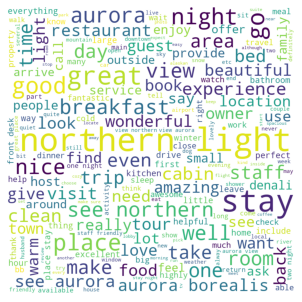

In [183]:
from wordcloud import WordCloud, STOPWORDS
test.single_string()

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(string) 
                
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();